In [6]:
import pickle
folder_path = 'output/'
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.stats import loglaplace,chi2
from labellines import *
import numpy as np


In [7]:

# Define the file path where the data is saved
file_path = f'{folder_path}overleaf/data/rmserejectcurve.pkl'

# Load the data from the file using pickle
with open(file_path, 'rb') as f:
    data_loaded = pickle.load(f)

# Now you can access the dictionaries in the list data_loaded
twinsc_rmse, twinsc_rmse_change, twinsc_reject_rates, \
ihdp_reject_rates, ihdp_rmse, ihdp_rmse_change = data_loaded

# Multiply each value in twinsc_rmse_change by 100
for key, value in twinsc_rmse_change.items():
    twinsc_rmse_change[key] = [x * 100 for x in value]

# Multiply each value in ihdp_rmse_change by 100
for key, value in ihdp_rmse_change.items():
    ihdp_rmse_change[key] = [x * 100 for x in value]

# Multiply each value in ihdp_reject_rates by 100
for key, value in ihdp_reject_rates.items():
    ihdp_reject_rates[key] = [x * 100 for x in value]

# Multiply each value in twinsc_reject_rates by 100
for key, value in twinsc_reject_rates.items():
    twinsc_reject_rates[key] = [x * 100 for x in value]



KeyError: 1

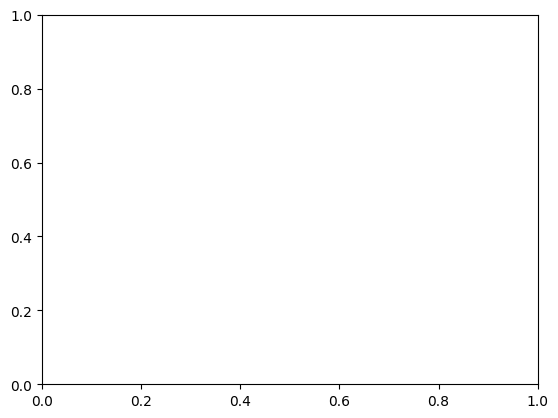

In [8]:

for dataset in ["ihdp", "twinsc"]:
    if dataset == "ihdp":
        reject_rates = ihdp_reject_rates
        rmse = ihdp_rmse
        rmse_change = ihdp_rmse_change
    elif dataset == "twinsc":
        reject_rates = twinsc_reject_rates
        rmse = twinsc_rmse
        rmse_change = twinsc_rmse_change
    # Create figure and axis objects
    fig, ax1 = plt.subplots()

    # All colors
    # colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

    # Same color means same same detection function
    # Same linestyle means same definition
    # colors = ['brown', 'blue', 'olive', 'brown', 'blue', 'olive', 'brown', 'blue', 'olive', 'orange']
    # linestyle = [':', ':', ':',       '-.', '-.', '-.',       '-', '-','-',     '--']

    # Same color means same definition
    # Same linestyle means same detection function
    colors = ['brown', 'brown', 'brown', 'blue', 'blue', 'blue', 'olive', 'olive', 'olive', 'orange']
    # linestyle = [':', '-.', '-',       ':', '-.', '-',       ':', '-.','-',     '--']
    linestyle = ['-', '-', '-',       '-', '-', '-',       '-', '-','-',     '-']

    # labels = ['N1', 'N1', 'N1', 'N2', 'N2', 'N2', 'N3', 'N3', 'N3', 'A1']
    # labels = ['N1-iF', 'N1-SVM', 'N1-LOF', 'N2-iF', 'N2-SVM', 'N2-LOF', 'N3-iF', 'N3-SVM', 'N3-LOF', 'A1']
    labels = ['iF', 'SVM', 'LOF', 'iF', 'SVM', 'LOF', 'iF', 'SVM', 'LOF', 'RFQR']

    max_rr = 13 # 7

    # Plot the change percentage on the left y-axis
    for i in range(1, len(rmse) + 1):
        # ax1.plot(ihdp_reject_rates[i][:max_rr], ihdp_rmse[i][:max_rr], label=f'Experiment {i}', color=colors[i-1], linestyle=linestyle[i-1])
        ax1.plot(reject_rates[i][:max_rr],rmse[i][:max_rr],label=labels[i-1], color=colors[i-1], linestyle=linestyle[i-1])
    
    
    # xvals = [2, 4, 6, 8, 10]

    # labelLines(plt.gca().get_lines(),xvals=xvals,zorder=2.5)
    labelLines(plt.gca().get_lines(),zorder=2.5)

    ax1.set_xlabel('Reject Rate (%)', color='black')
    ax1.set_ylabel('Absolute Error', color='black')
    ax1.tick_params(axis='y', colors='black')

    # Create a second y-axis for the absolute error
    ax2 = ax1.twinx()
    for i in range(1, len(rmse_change) + 1):
        # ax2.plot(ihdp_reject_rates[i][:max_rr], ihdp_rmse_change[i][:max_rr], label=f'Experiment {i}',color=colors[i-1], linestyle=linestyle[i-1])
        ax2.plot(reject_rates[i][:max_rr],rmse_change[i][:max_rr], color=colors[i-1], linestyle=linestyle[i-1], alpha=0) # Invisible
    # labelLines(plt.gca().get_lines(),zorder=2.5)
    ax2.set_ylabel('Relative Error (%)', color='black')
    ax2.tick_params(axis='y', colors='black')

    # Add a dotted vertical line at x = 5
    ax2.axhline(y=0, color='gray', linestyle='--')
    ax2.set_xlabel('Reject Rate (%)', color='black')

    # Set x-axis limit
    # ax1.set_xlim(0, 15)
    # ax2.set_xlim(0, 15)

    # Add legend on one graph
    if dataset == "twinsc":
        lines1, labels1 = ax1.get_legend_handles_labels()
        # lines2, labels2 = ax2.get_legend_handles_labels()
        lines = lines1 #+ lines2
        # labels = ['iForest', 'oc-SVM', 'LOF', 'N2', 'N2', 'N2', 'N3', 'N3', 'N3', 'A1555']
        # labels = ['Novelty 1', 'N1', 'N1','Novelty 2', 'N2', 'Novelty 2','Novelty 3', 'N3', 'N3','Ambiguity 1']
        labels = ['Singular Comparison Novelty Score', 'Singular Comparison Novelty Score', 'Singular Comparison Novelty Score','Groupwise Comparison Novelty Score', 'Groupwise Comparison Novelty Score', 'Groupwise Comparison Novelty Score','Hybrid Comparison Novelty Score', 'Hybrid Comparison Novelty Score', 'Hybrid Comparison Novelty Score','Ambiguity Score']

        # labels = labels1 #+ labels2
        ax1.legend([lines[0],lines[3],lines[6], lines[9]],[labels[0],labels[3],labels[6], labels[9]])
        # ax1.legend(lines, labels, loc='upper left')

    plt.tight_layout()
    plt.savefig(f"{folder_path}overleaf/rmse/{dataset}_rmserejectcurve.pdf")

    # Show the plot
    plt.show()